<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project4 - Clustering</h3>
</div>

<img src = "https://miro.medium.com/max/5760/1*_SRbz8535-CxPzo6IL9pBA.png" width=80%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.cluster import KMeans


## Load and Prepare Data

In [95]:
df=pd.read_csv("C:\\Users\\Surface Book\\Desktop\\Mini Project 4 - Clustering(Market Basket Analysis )\\Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


## EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Preprocessing

In [96]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

## Strorytelling - Visualization

Text(0.5, 1.0, 'Age VS Income')

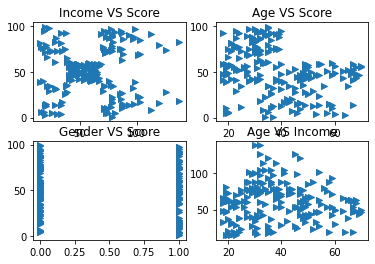

In [97]:
fig, axs = plt.subplots(2, 2)
#plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

axs[0, 0].scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'], marker=">")
axs[0, 0].set_title("Income VS Score")

axs[0, 1].scatter(x=df['Age'],y=df['Spending Score (1-100)'], marker=">")
axs[0, 1].set_title("Age VS Score")

axs[1, 0].scatter(x=df['Gender'],y=df['Spending Score (1-100)'], marker=">")
axs[1, 0].set_title("Gender VS Score")
#plt.scatter(x=df['Age'],y=df['Spending Score (1-100)'])

axs[1, 1].scatter(x=df['Age'],y=df['Annual Income (k$)'], marker=">")
axs[1, 1].set_title("Age VS Income")

## Trani the Model (Clustering)

### K-Means

In [98]:
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


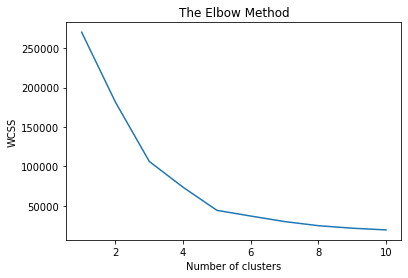

In [99]:
X = df.iloc[:, [3, 4]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [101]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

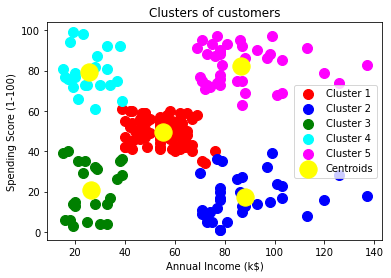

In [102]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


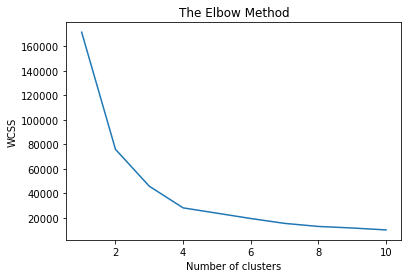

In [53]:
X = df.iloc[:, [2, 4]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
kmeans.cluster_centers_

array([[55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617]])

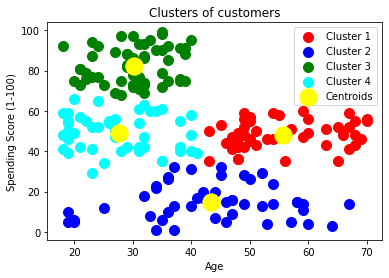

In [50]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### DBSCAN

#### How to find best params for DBSCAN?

In [186]:
X = df.iloc[:, [3, 4]].values
eps=np.arange(0.001, 20, 0.4)
min_smple=np.arange(1,20)
lst=[]
lst2=[]
for i in min_smple:
    for j in eps:
        db=DBSCAN(eps=j, min_samples=i).fit(X)
        if (5<np.count_nonzero(db.labels_ == -1)<30) and (4<len(set(db.labels_))<8):
            lst.append((j,i,np.count_nonzero(db.labels_ == -1)))
            lst2.append((j,i,np.count_nonzero(db.labels_ == -1),len(set(db.labels_))))
lst2

[(9.601, 2, 6, 7),
 (10.001, 2, 6, 7),
 (10.401, 2, 6, 7),
 (9.601, 3, 10, 5),
 (10.001, 3, 10, 5),
 (10.401, 3, 10, 5),
 (8.801, 5, 24, 7),
 (9.201, 5, 21, 7),
 (9.601, 5, 17, 5),
 (10.001, 5, 17, 5),
 (10.401, 5, 15, 5),
 (9.601, 6, 23, 7),
 (10.001, 6, 20, 5),
 (10.401, 6, 19, 5),
 (10.801, 6, 18, 5),
 (9.601, 7, 23, 7),
 (10.001, 7, 23, 6),
 (10.401, 7, 20, 5),
 (10.801, 7, 20, 5),
 (11.201, 7, 17, 5),
 (10.801, 8, 25, 6),
 (11.201, 8, 19, 5),
 (11.201, 9, 24, 6),
 (11.601, 9, 24, 6),
 (12.001, 9, 23, 6),
 (12.401, 9, 17, 5),
 (11.201, 10, 29, 6),
 (11.601, 10, 29, 6),
 (12.001, 10, 28, 6),
 (12.401, 10, 26, 5),
 (12.801, 10, 26, 5),
 (12.401, 11, 27, 5),
 (12.801, 11, 27, 5),
 (13.201, 11, 25, 5)]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  if sys.path[0] == '':


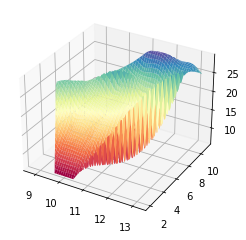

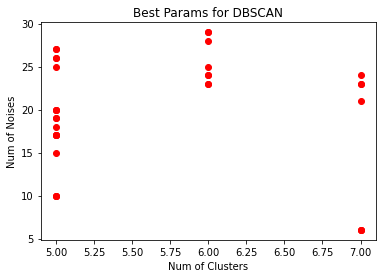

In [196]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np

data=lst
x, y, z = zip(*data)
grid_x, grid_y = np.mgrid[min(x):max(x):500j, min(y):max(y):500j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(grid_x, grid_y, grid_z, cmap=plt.cm.Spectral)
plt.show()

    
x_val = [x[3] for x in lst2]
y_val = [x[2] for x in lst2]
plt.plot(x_val,y_val,'or')
plt.xlabel("Num of Clusters")
plt.ylabel("Num of Noises")
plt.title("Best Params for DBSCAN")
plt.show()

#### Then best Params for DBSCAN are eps=10 min_sample=7

In [204]:
db=DBSCAN(eps=10, min_samples=7).fit(X)
print(db.labels_)
print("num of clusters are",(len(set(db.labels_)))-1)

[ 2  1  0  1  2  1  0 -1  0  1  0 -1  0  1  0  1  2  1  2 -1  2  1  0  1
  0  1  2 -1  2  1  0  1  0 -1  0  1  0  1  2  1  2 -1  2  2  2  1  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  2  3  2  3  4  3  4  3  2  3  4  3  4  3  4  3  4  3  2  3
  4  3  2  3  4  3  4  3  4  3  4  3  4  3  4  3  2  3  4  3  4  3  4  3
  4 -1  4  3  4  3  4  3  4  3  4  3 -1  3  4  3 -1  3 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
num of clusters are 5


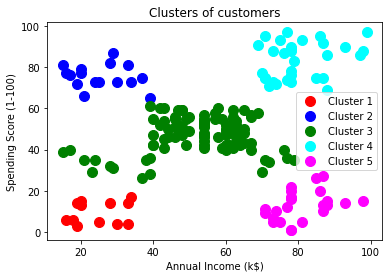

In [212]:
plt.scatter(X[db.labels_ == 0, 0], X[db.labels_ == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[db.labels_ == 1, 0], X[db.labels_ == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[db.labels_ == 2, 0], X[db.labels_ == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[db.labels_ == 3, 0], X[db.labels_ == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[db.labels_ == 4, 0], X[db.labels_ == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Send us the Result (Maktabkhoone)